In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df = pd.read_csv("HW2_heart.csv", header=0)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [49]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df[['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]:
    df[col]=le.fit_transform(df[col])

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [6]:
df.groupby('HeartDisease').mean()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,,
0,50.551220,0.651220,1.192683,130.180488,227.121951,0.107317,0.948780,148.151220,0.134146,0.408049,1.739024
1,55.899606,0.901575,0.448819,134.185039,175.940945,0.334646,1.021654,127.655512,0.622047,1.274213,1.057087


In [50]:
df.groupby('HeartDisease').agg(lambda x: x.value_counts().index[0]).reset_index()

,HeartDisease,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0,54,1,1,120,0,0,1,150,0,0.0,2
1,1,58,1,0,120,0,0,1,120,1,0.0,1


In [7]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


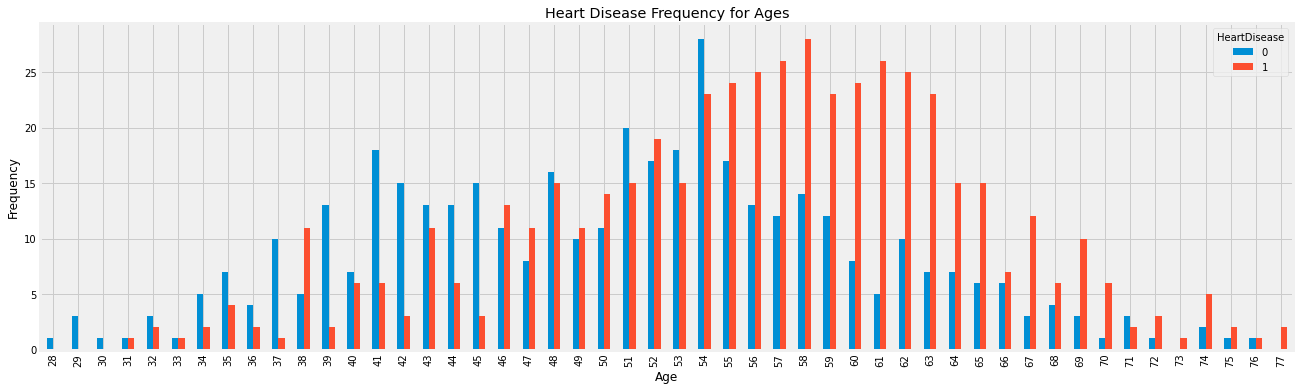

In [8]:
import matplotlib.pyplot as plt

pd.crosstab(df.Age,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

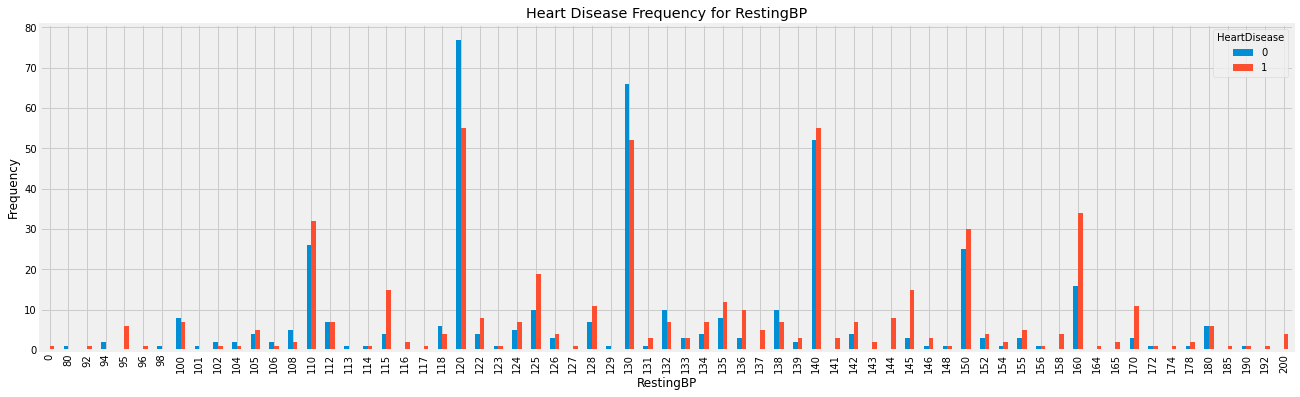

In [9]:
pd.crosstab(df.RestingBP,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('Frequency')

plt.show()

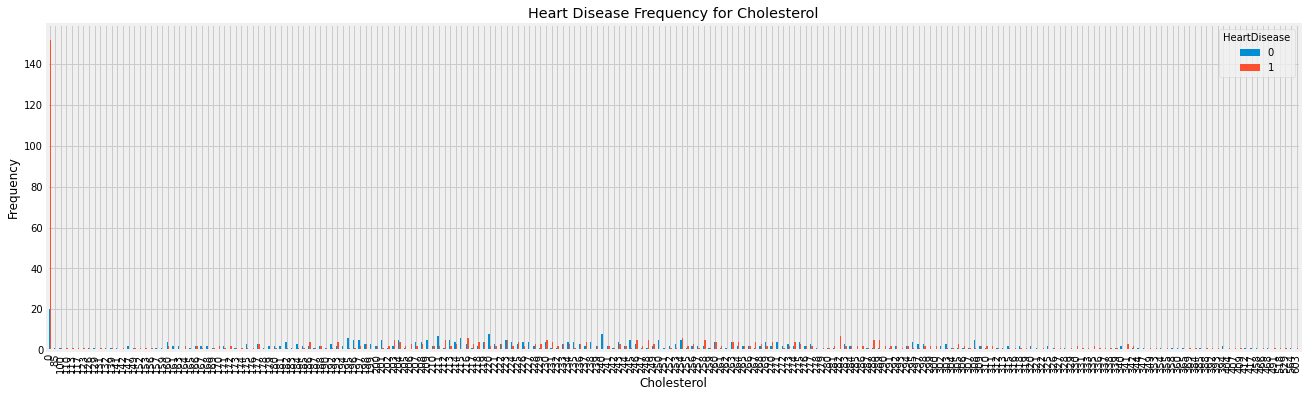

In [10]:
pd.crosstab(df.Cholesterol,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

plt.show()

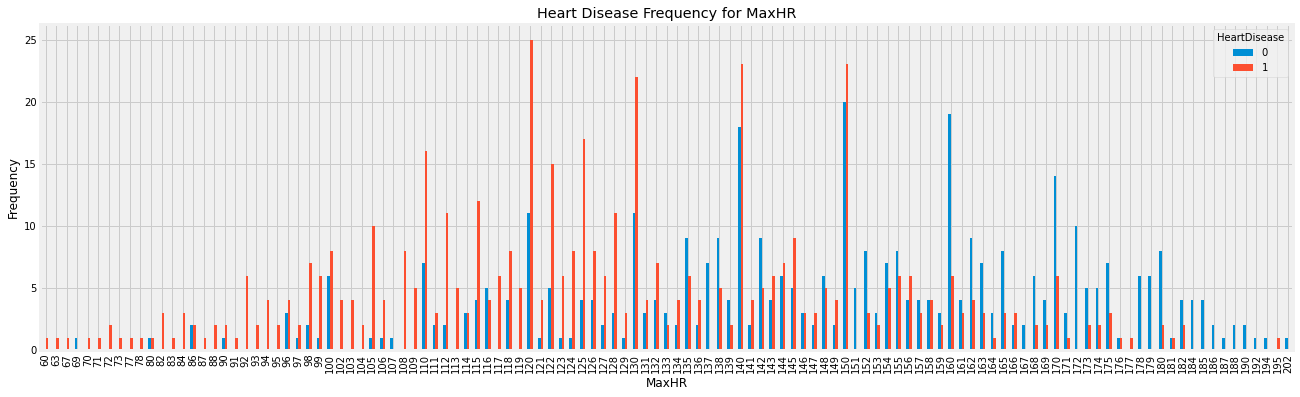

In [11]:
pd.crosstab(df.MaxHR,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Frequency')

plt.show()

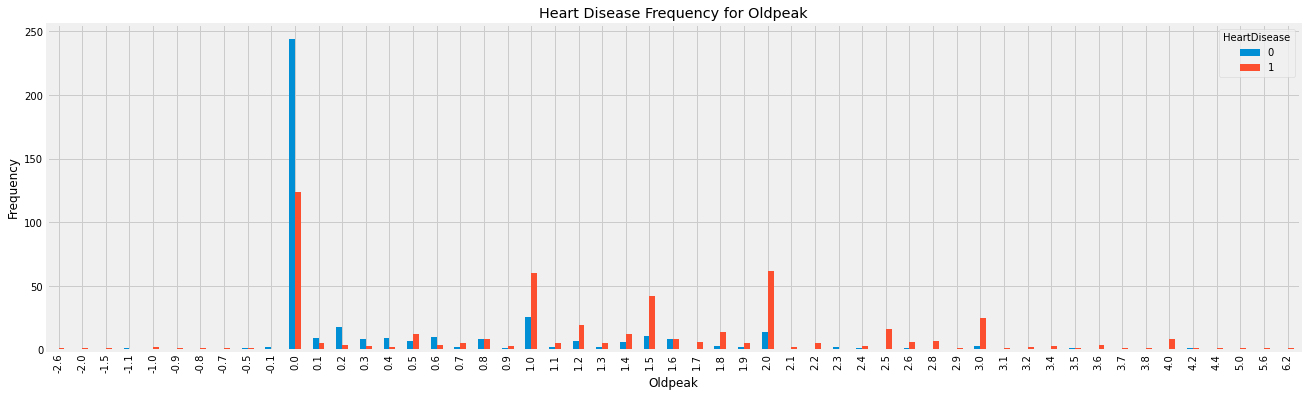

In [12]:
pd.crosstab(df.Oldpeak,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')

plt.show()

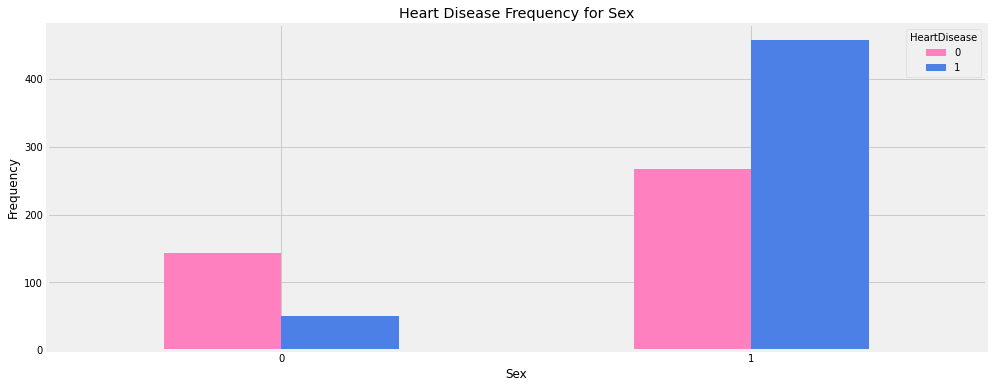

In [13]:
pd.crosstab(df.Sex,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#FF80BF','#4D80E6' ])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')

plt.show()

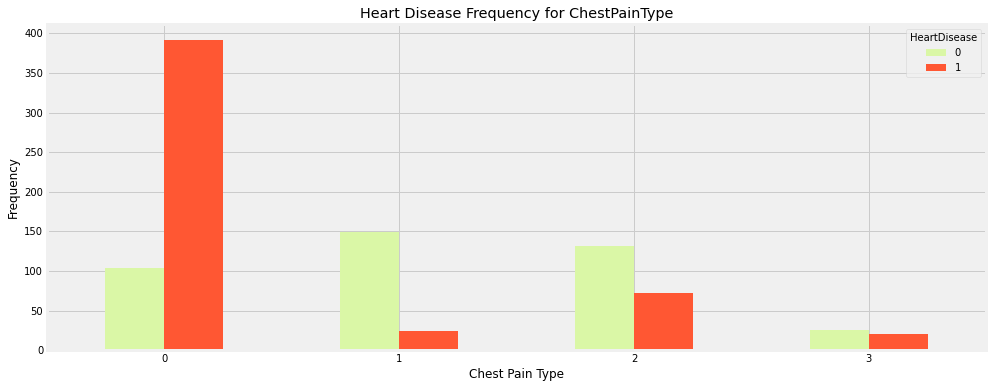

In [14]:
pd.crosstab(df.ChestPainType,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])

plt.title('Heart Disease Frequency for ChestPainType')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')

plt.show()

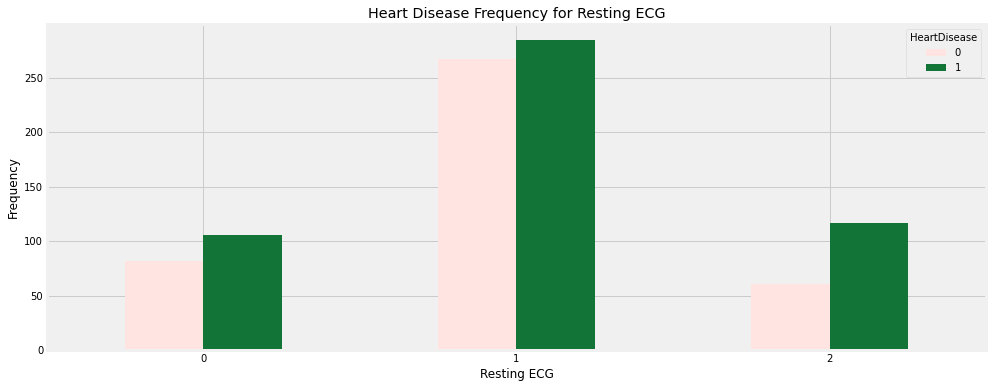

In [15]:
pd.crosstab(df.RestingECG,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#FFE4E1','#127436' ])

plt.title('Heart Disease Frequency for Resting ECG')
plt.xlabel('Resting ECG')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')

plt.show()

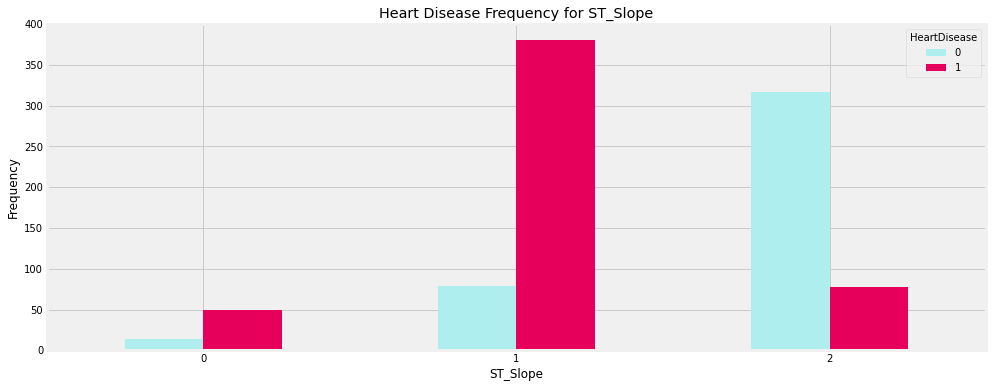

In [16]:
pd.crosstab(df.ST_Slope,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#AFEEEE','#E6005C' ])

plt.title('Heart Disease Frequency for ST_Slope')
plt.xlabel('ST_Slope')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')

plt.show()

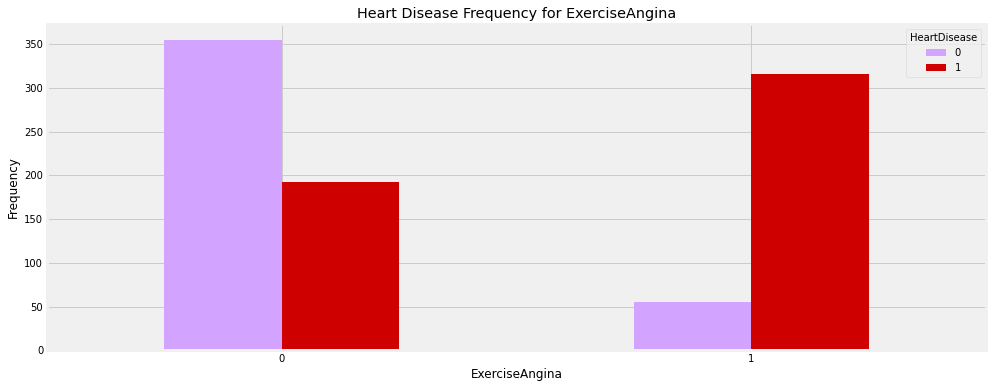

In [17]:
pd.crosstab(df.ExerciseAngina,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#D3A4FF','#CE0000' ])

plt.title('Heart Disease Frequency for ExerciseAngina')
plt.xlabel('ExerciseAngina')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')

plt.show()

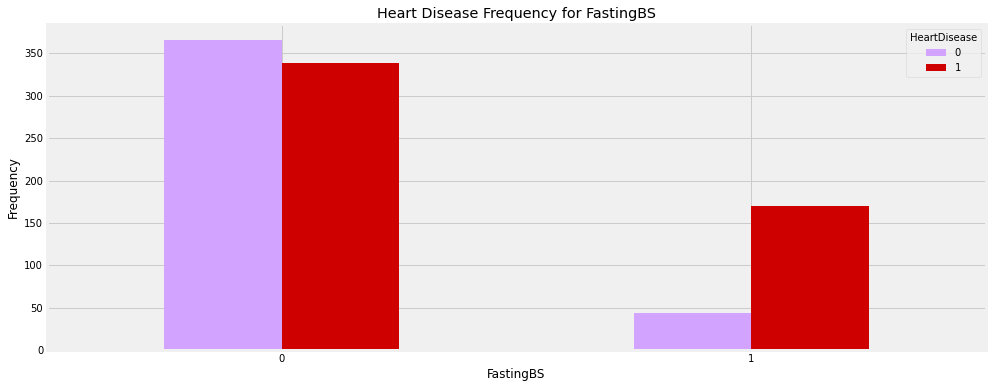

In [43]:
pd.crosstab(df.FastingBS,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#D3A4FF','#CE0000' ])

plt.title('Heart Disease Frequency for FastingBS')
plt.xlabel('FastingBS')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')

plt.show()

In [18]:
a = pd.get_dummies(df['ChestPainType'], prefix = "ChestPainType")
b = pd.get_dummies(df['RestingECG'], prefix = "RestingECG")
c = pd.get_dummies(df['ST_Slope'], prefix = "ST_Slope")

In [19]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,1,1,140,289,0,1,172,0,0.0,...,0,1,0,0,0,1,0,0,0,1
1,49,0,2,160,180,0,1,156,0,1.0,...,0,0,1,0,0,1,0,0,1,0
2,37,1,1,130,283,0,2,98,0,0.0,...,0,1,0,0,0,0,1,0,0,1
3,48,0,0,138,214,0,1,108,1,1.5,...,1,0,0,0,0,1,0,0,1,0
4,54,1,2,150,195,0,1,122,0,0.0,...,0,0,1,0,0,1,0,0,0,1


In [20]:
df = df.drop(columns = ['ChestPainType', 'RestingECG', 'ST_Slope'])

df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [21]:
data_df = df.drop(columns = ['HeartDisease'])

x = data_df
y = df['HeartDisease']

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

print("number of training samples:",x_train.shape[0])
print("number of test samples:", x_test.shape[0])

number of training samples: 642
number of test samples: 276


In [25]:
from sklearn.linear_model import LogisticRegression

logisticModel = LogisticRegression(random_state=0)
logisticModel.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [27]:
print('Test Accuracy: ',logisticModel.score(x_test,y_test))

Test Accuracy:  0.8369565217391305


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors = 2)
knnModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [29]:
print('Test Accuracy: ',knnModel.score(x_test,y_test))

Test Accuracy:  0.8260869565217391


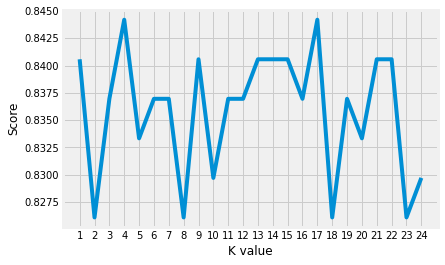

In [32]:
scoreList = []
for i in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,25), scoreList)
plt.xticks(np.arange(1,25,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [34]:
from sklearn import svm

svcModel = svm.SVC(kernel='linear', C=1, random_state = 0)
svcModel.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [35]:
print('Test Accuracy: ',svcModel.score(x_test,y_test))

Test Accuracy:  0.8405797101449275


In [36]:
polyModel = svm.SVC(kernel='poly', degree=3, gamma='auto', C=1, random_state = 0)
polyModel.fit(x_train, y_train)

print('Test Accuracy: ',polyModel.score(x_test,y_test))

Test Accuracy:  0.8297101449275363


In [40]:
rbfModel = svm.SVC(kernel='rbf', gamma=0.7, C=1, random_state = 0)
rbfModel.fit(x_train, y_train)

print('Test Accuracy: ',rbfModel.score(x_test,y_test))

Test Accuracy:  0.7717391304347826


In [41]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
randomForestModel.fit(x_train, y_train)

print('Test Accuracy: ',randomForestModel.score(x_test,y_test))

Test Accuracy:  0.8586956521739131


In [42]:
print('特徵重要程度: ',randomForestModel.feature_importances_)

特徵重要程度:  [0.07444872 0.02930084 0.06604949 0.08538503 0.0189414  0.09354001
 0.06786232 0.11525317 0.07872207 0.02656439 0.01362351 0.00729865
 0.01168438 0.01085376 0.00813167 0.00961233 0.12430301 0.15842524]


In [ ]:
RestingBP, Oldpeak